# Анализируем результаты RNA-seq анализа 4 регионов мозга человека

## Цель - выявить дифференциально-экспрессирующиеся гены, проанализировать обагощение по GO

In [1]:
import pandas as pd

## Готовим таблицу с описанием образцов

In [18]:
samples = pd.read_csv(r'/Users/igorfesenko/project.samples.tsv', sep='\t', names=['tissue','R1','R2'])

готовом таблицу для загрузки в R

In [19]:
samples['tissue'] = samples['tissue'].map(lambda x: x.split(' ', maxsplit=1)[1])

In [20]:
samples['sample'] = samples['R1'].map(lambda x: x.split('_', maxsplit=1)[0])
samples.drop(columns=['R1','R2'],inplace=True)

In [24]:
samples['sample'] = samples['sample'].map(lambda x: x.replace('-','.'))

In [27]:
samples

,tissue,sample
HA74,Prefrontal (BA10),R18001261.BM1.BM1.11
HB74,Prefrontal (BA10),R18001263.BM3.BM3.2
HC74,Prefrontal (BA10),R18001262.BM2.BM2.20
HD74,Prefrontal (BA10),R18001262.BM2.BM2.13
HA32,Hypothalamus,R18001261.BM1.BM1.20
HB32,Hypothalamus,R18001261.BM1.BM1.14
HC32,Hypothalamus,R18001262.BM2.BM2.2
HD32,Hypothalamus,R18001263.BM3.BM3.16
HA71,Cerebellar White Matter,R18001265.BM5.BM5.13
HB71,Cerebellar White Matter,R18001261.BM1.BM1.2


## Анализ вариабельности образцов в R (RNAseq_human.R)

**Посмотрим на распределение каунтов в первом образце**

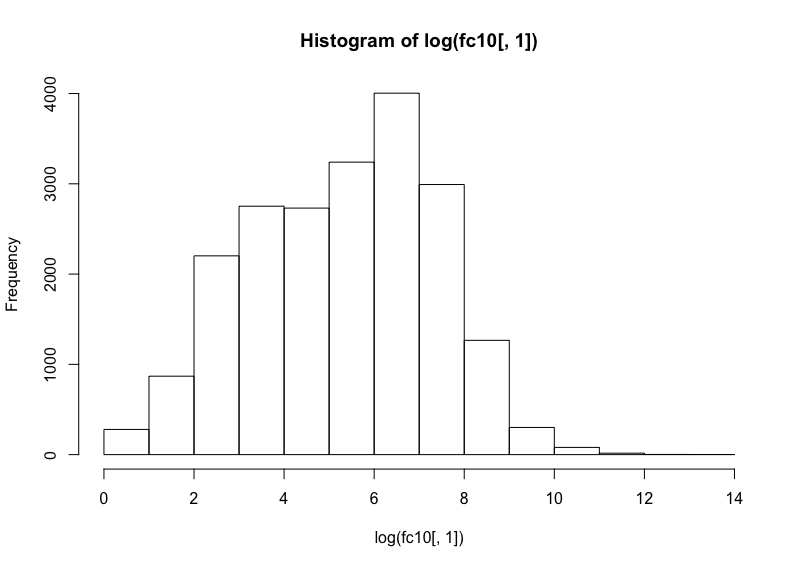

Распределение похоже на лог-нормальное

Сделаем отсечку - не менее 10 ридов на образец. В таком случае общее число генов составит - 20890

**Оценим корреляцию между образцами (Спирмен)**

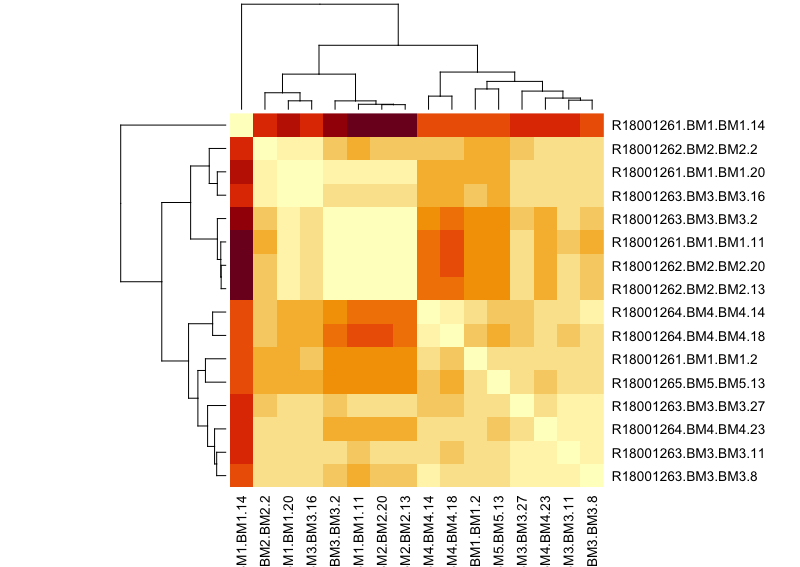

Мы видим, что образцы из региона Prefrontal лучше всего скоррелированы между собой.

**Multidimensional scaling (MDS)**

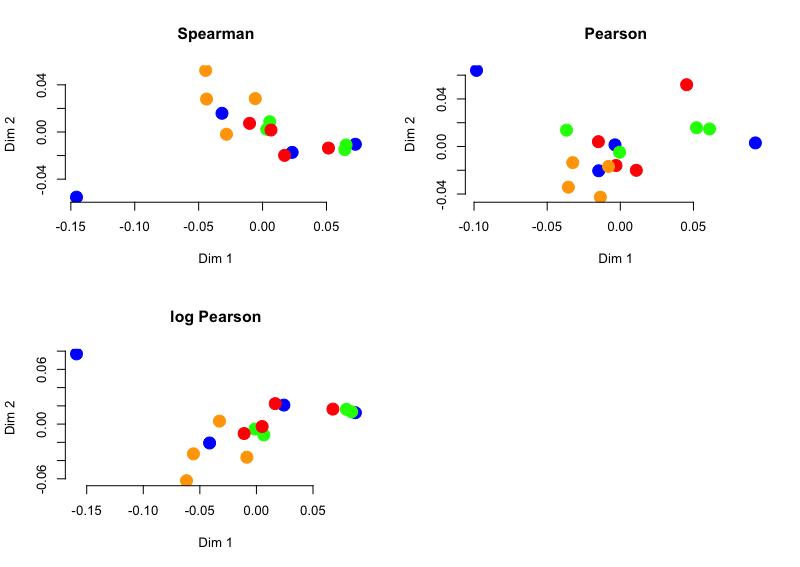

Мы видим, что самосогласованность между образцами слабая. Можно выделить регион Cerebellar Grey Matter (orange)

**PCA**

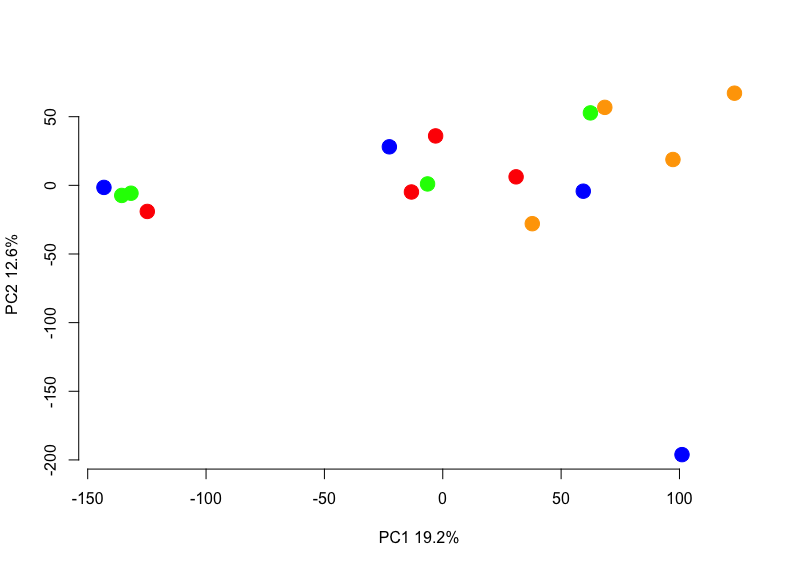

## Поиск DE генов

**Зависимость вариабельности от средней экспресии (edgeR)**

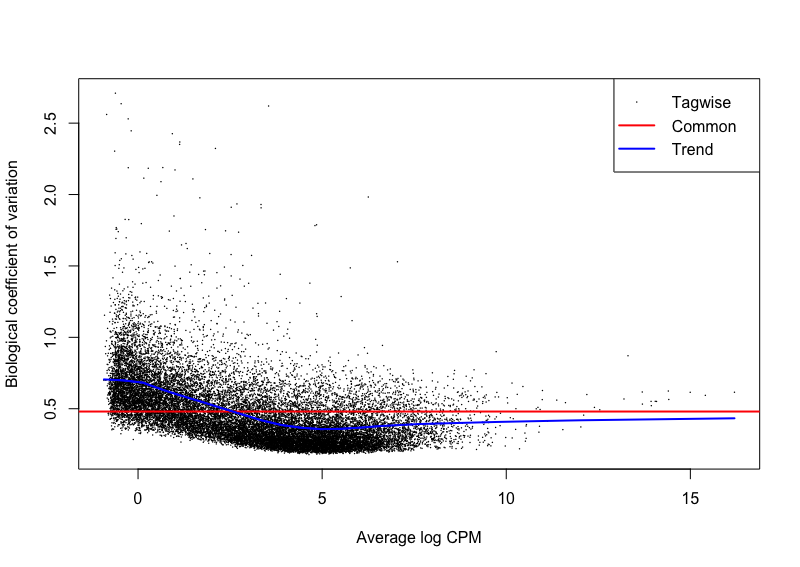

**Строим GLM модель и считаем p-value**

распределение p-value

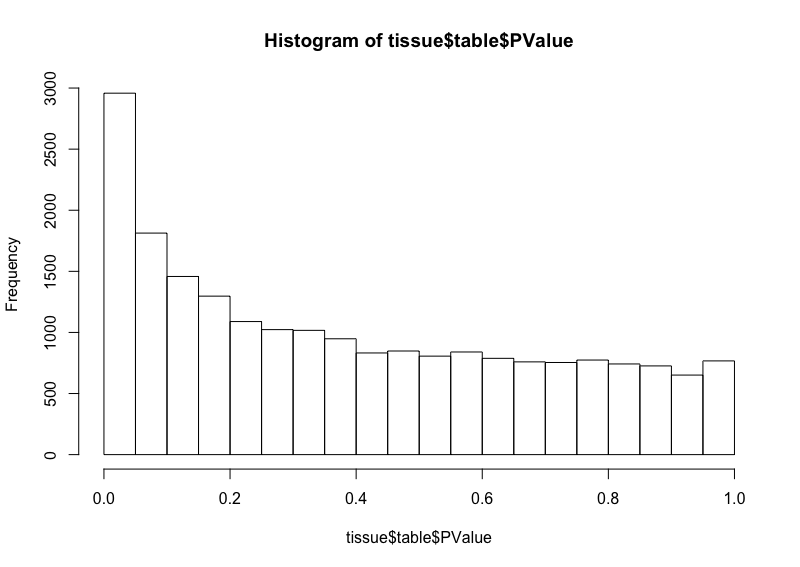

Есть пик около 0, значит есть различающиеся гены

С четом поправки на множественное сравнение получается 255 гена, которые значимо меняются в разных регионах мозга

## Посчитаем GO enrichment

Используем пакет topGO

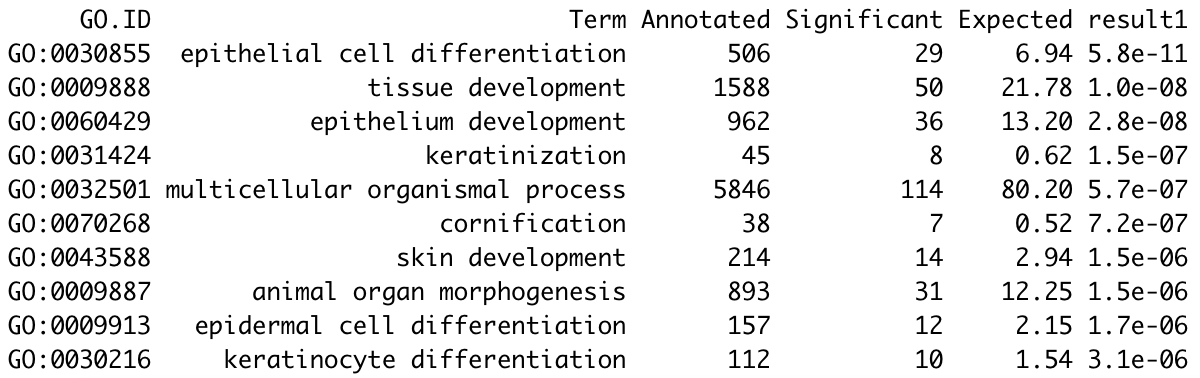

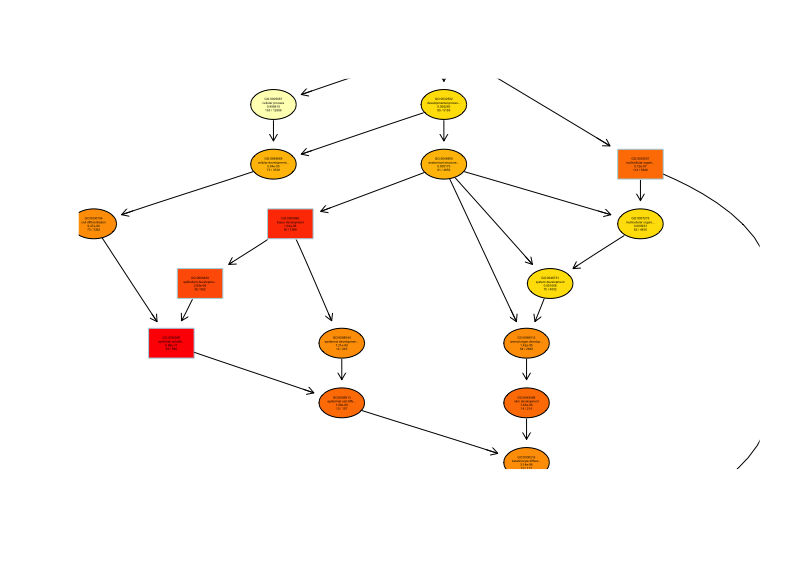

Странный результат, нет GO terms связанных с нервной тканью